# Tópicos Especiais em Processamento da Informação: Ciência de Dados

Prof. Luiz Affonso Guedes Engenharia de Computação - UFRN 2017-2


## Conteúdo:
- Visualização de mapas
    - Pacote Basemap
- Pacote Seaborn
    - Visualização de dados estatísticos

## Visualização de Mapas
Um tipo comum de visualização na ciência dos dados é o de dados geográficos. A ferramenta principal do Matplotlib para este tipo de visualização é o Basemap toolkit, que é um dos vários kits de ferramentas Matplotlib pertencentes ao mpl_toolkits name space. 

O Basemap parece um pouco complicado de usar e, muitas vezes, mesmo as visualizações simples levam muito mais tempo para renderizar do que você pode esperar. Soluções mais modernas, como a API do Google Maps, podem ser uma escolha melhor para visualizações de mapas mais complexos. 

Ainda assim, o Basemap é uma ferramenta útil para os usuários do Python ter em seus cintos de ferramentas virtuais. 

In [ ]:
# Istalar a basemap no conda (linha de comando)
#! conda install basemap

In [1]:
# Carregando os pacotes numpy e matplotlib
# carregando o Basemap

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

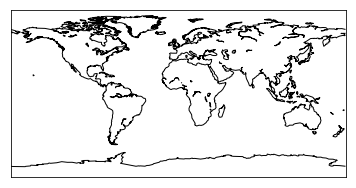

In [2]:
# Exemplo de mapa mundi simples - só o contorno

map = Basemap()

map.drawcoastlines()

In [ ]:
# Exemplo de mapa mundi

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')

map.drawcoastlines()

In [ ]:
# Com limitação dos países
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')

map.drawcountries() ## Desenho dos limites dos países


In [ ]:
# Exemplo: mapa mundi

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawlsmask(land_color = "#ddaa66", 
               ocean_color="#7777ff",
               resolution = 'l')

In [ ]:
# Exemplo de plot do mapa da terra

plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

A coisa útil é que o mundo mostrado aqui não é uma mera imagem. É um funcionamento completo dos eixos Matplotlib que entende coordenadas esféricas e que nos permite sobrepor facilmente dados no mapa! 

Por exemplo, podemos usar uma projeção de mapa diferente, ampliar a América do Norte e traçar a localização de Seattle. Para isto, usaremos uma imagem de etopo (que mostra características topográficas tanto em terra como sob o oceano) como o fundo do mapa:

In [ ]:
# Exemplo de uso do método etopo()

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Mapa (long, lat) para (x, y) no plot
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);



### Projeção de Mapas
A primeira coisa a decidir ao usar mapas é a projeção a ser usada. Você provavelmente está familiarizado com o fato de que é impossível projetar um mapa esférico, como o da Terra, sobre uma superfície plana sem de alguma forma distorcê-lo ou romper sua continuidade. 

Projeções de mapas foram desenvolvidas ao longo da história humana, e há muitas opções! Dependendo do uso pretendido da projeção do mapa, existem determinados recursos do mapa (por exemplo, direção, área, distância, forma ou outras considerações) que são úteis para manter.

O pacote Basemap implementa várias dessas projeções, todas referenciadas por um código de formato curto. Aqui vamos demonstrar brevemente alguns das mais comuns.



Começaremos por definir uma rotina de conveniência para desenhar o nosso mapa mundial juntamente com as linhas de longitude e latitude:

In [3]:
# Função para desenhar mapas de forma mais conveniente

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Projeções Cilíndricas:
As projeções de mapa mais simples são as projeções cilíndricas, nas quais linhas de latitude e longitude constantes são mapeadas para linhas horizontais e verticais, respectivamente. Este tipo de mapeamento representa bastante bem as regiões equatoriais, mas resulta em distorções extremas perto dos pólos. O espaçamento das linhas de latitude varia entre diferentes projeções cilíndricas, levando a diferentes propriedades de conservação e distorção diferente perto dos pólos. 

Na figura a seguir, mostramos um exemplo da projeção cilíndrica equidistante, que escolhe uma escala de latitude que preserva as distâncias ao longo dos meridianos. Outras projeções cilíndricas são as projeções Mercator (projection = 'merc') e as áreas cilíndricas de área igual (projection = 'cea').

In [ ]:
# Exemplo de projeção simples

map = Basemap(projection='cyl')

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

In [ ]:
# Projeções cilíndricas
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

Os argumentos adicionais para Basemap para esta vista especificam a latitude (lat) e longitude (lon) do canto inferior esquerdo (llcrnr -  lower-left corner) e canto superior direito (urcrnr - upper-right corner) para o mapa desejado, em unidades de graus.

### Projeções Pseudo-Cilíndricas
As projeções pseudo-cilíndricas relaxam a exigência de que os meridianos (linhas de longitude constante) permaneçam verticais. Isso pode dar melhores propriedades perto dos pólos da projeção. A projeção Mollweide (projection = 'moll') é um exemplo comum disso, em que todos os meridianos são arcos elípticos. É construído de modo a preservar a área em todo o mapa: embora existam distorções próximas aos pólos, a área de pequenos remendos reflete a área verdadeira. Outras projeções pseudo-cilíndricas são as projeções sinusoidais (projection = 'sinu') e Robinson (projection = 'robin').

In [ ]:
# Exemplo de uso de projeção pseudo-cilíndrica
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

Altere os valores dos parâmetros lat_0 e lon_0=0 e observe o que ocorre ao gráfico:
lon_0 = 45, 60, 180


In [ ]:
# Exercício


### Projeções de Perspectivas
As projeções de perspectiva são construídas usando uma escolha particular de ponto de perspectiva, semelhante a se fotograr a Terra a partir de um ponto particular do espaço (um ponto que, para algumas projeções, encontra-se tecnicamente dentro da Terra!). 

Um exemplo comum é a projeção ortográfica (projection = 'ortho'), que mostra um lado do globo como visto de um espectador a uma distância muito longa. Como tal, pode mostrar apenas metade do globo de cada vez. Outras projeções baseadas em perspectiva incluem a projeção gnomônica (projection = 'gnom') e projeção estereográfica (projection = 'stere'). Estes são muitas vezes os mais úteis para mostrar pequenas porções do mapa.

In [ ]:
# Exemplo de uso de projeções

map = Basemap(projection='aeqd', lon_0 = 10, lat_0 = 50)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

In [ ]:
# Exemplo de uso de projeções
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

In [ ]:
# Teste o parâmetro projection com 'stere' e 'gnorm'


### Projeções Cônicas
Uma projeção cônica projeta o mapa em um único cone, que é desenrolado. Isso pode levar a propriedades locais muito boas, mas regiões distantes do ponto de foco do cone podem tornar-se muito distorcidas. Um exemplo disto é a projeção da Conica Conformal Lambert (projeção = 'lcc'), que vimos anteriormente no mapa da América do Norte. 

Esse método projeta o mapa em um cone disposto de forma que dois paralelos padrão (especificados em Basemap por lat_1 e lat_2) tenham distâncias bem representadas, com a escala diminuindo entre eles e aumentando para fora deles. 

Outras projeções cônicas úteis são a projeção cônica equidistante (projection = 'eqdc') e a projeção de área igual de Albers (projection = 'aea'). As projeções cônicas, como as projeções em perspectiva, tendem a ser boas escolhas para representar pequenos e médias remendos do globo.

In [ ]:
# Uso de projeção cônica
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

In [ ]:
# Exemplo - projeção da ilha Minorca- Ilhas Baleares - Espanha
map = Basemap(llcrnrlon=3.75,llcrnrlat=39.75,urcrnrlon=4.35,urcrnrlat=40.15, resolution = 'h', epsg=5520)

map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

In [ ]:
# Exemplo - Ilha Minorca com projeção UTM zone 31N
map = Basemap(llcrnrlon=3.75,llcrnrlat=39.75,urcrnrlon=4.35,urcrnrlat=40.15, epsg=5520)
#http://server.arcgisonline.com/arcgis/rest/services

map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)

In [ ]:
# Exemplo: 
map = Basemap(projection='aeqd', lon_0 = 10, lat_0 = 50)

print("Coordenada do ponto no mapa", map(10, 50))
print("posição da coordenada no mapa",  map(20015077.3712, 20015077.3712, inverse=True))

In [ ]:
# Exemplo - mapas das américas do norte e central

map = Basemap(width=12000000,height=9000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66', lake_color='aqua')

map.drawcountries()
map.drawstates(color='0.5')

In [ ]:
# Exercício: Desenhe o mapa do Brasil


In [ ]:
# Exercício: Desenhe o mapa do RN


## Usando Mapas com Background
Anteriormente, vimos os métodos bluemarble( ) e shadedrelief( ) para projetar imagens globais no mapa, bem como os métodos drawparallels( ) e drawmeridians( ) para desenhar linhas de latitude e longitude constantes. O pacote Basemap contém uma variedade de funções úteis para desenhar bordas de recursos físicos como continentes, oceanos, lagos e rios, bem como fronteiras políticas, como países e estados e municípios. 


Exemplos de métodos disponíveis no Basemap:

- Physical boundaries and bodies of water
        - drawcoastlines(): Draw continental coast lines
        - drawlsmask(): Draw a mask between the land and sea, for use with projecting images on one or the other
        - drawmapboundary(): Draw the map boundary, including the fill color for oceans.
        - drawrivers(): Draw rivers on the map
        fillcontinents(): Fill the continents with a given color; optionally fill lakes with another color

- Political boundaries
        - drawcountries(): Draw country boundaries
        - drawstates(): Draw US state boundaries
        - drawcounties(): Draw US county boundaries

- Map features
        - drawgreatcircle(): Draw a great circle between two points
        - drawparallels(): Draw lines of constant latitude
        - drawmeridians(): Draw lines of constant longitude
        - drawmapscale(): Draw a linear scale on the map

- Whole-globe images
        - bluemarble(): Project NASA's blue marble image onto the map
        - shadedrelief(): Project a shaded relief image onto the map
        - etopo(): Draw an etopo relief image onto the map
        warpimage(): Project a user-provided image onto the map


## Plotar dados sobre o Mapa
Talvez a peça mais útil do kit de ferramentas Basemap seja a capacidade de superar uma variedade de dados em um plano de fundo. 

As funções do plt funcionam sobre o mapa; você pode usar a instância Basemap para projetar coordenadas de latitude e longitude para coordenadas (x, y) para plotar com plt.

Além disso, existem muitas funções específicas do mapa disponíveis como métodos da instância do Basemap. Estas funcionam de forma muito semelhante às suas equivalentes do padrão Matplotlib, mas possuem um argumento booleano adicional, que, se definido como True, permite que você passe as latitudes e as longitudes cruas para o método, em vez das coordenadas projetadas (x, y).

Alguns métodos específicos para mapas:
    - contour()/contourf() : Desenha linhas de contorno.
    - imshow(): Desenha uma imagem.
    - pcolor()/pcolormesh() : Desenha plot com pseudocolor plot malhas irregulares/regulares.
    - plot(): Desenha linhas ou marcadores.
    - scatter(): Desenha pontos com marcadores.
    - quiver(): Desenha vetores.
    - barbs(): Desenha raw linhas de vento (wind barbs).
    - drawgreatcircle(): Desenha a circle.


### Exemplo sobre análise de dados com mapa do Estado da Califónia

In [4]:
import pandas as pd
cities = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv')

# Extração do dada de interesse
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

In [ ]:
cities.head()

In [ ]:
# 1. Desenhae o mapa em background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, com cor refletindo a população
# and tamanho (raio) refletindo a área
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. criação da barra de cores e legenda
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# Fazer legenda com pontos (círculos)
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')

### Link para Tutorial sobre Basemap
https://basemaptutorial.readthedocs.io/en/latest/index.html

## Pacote Seaborn

O Seaborn fornece uma API no topo do Matplotlib que oferece opções para o estilo de gráficos e os padrões de cores, define funções simples de alto nível para tipos de plots de dados estatísticos e integra-se com a funcionalidade fornecida pela Pandas DataFrames.

### Exemplo de uso do MatPlot

In [5]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [6]:
# Criação de dados randômicos
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)


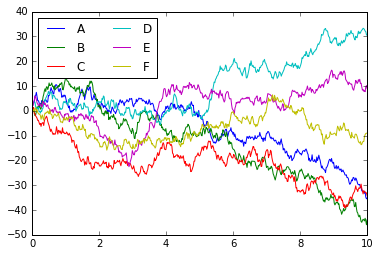

In [7]:
# Plot dos dados com o pacote Matplotlib
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [8]:
# Importação e configuração para opadrão Seaborn
import seaborn as sns
sns.set()

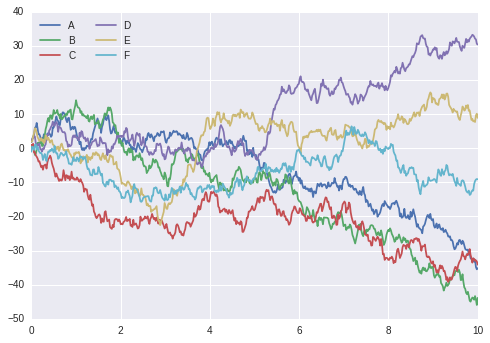

In [9]:
# Mesmo programa do exemplo anterior, porém com Seaborn
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Plots com Seaborn
A principal idéia da Seaborn é que ele fornece comandos de alto nível para criar uma variedade de tipos de gráficos úteis para a exploração de dados estatísticos e até mesmo alguns modelos de modelos estatísticos.

Vamos dar uma olhada em alguns dos conjuntos de dados e tipos de plots disponíveis em Seaborn. Observe que tudo o que se segue pode ser feito usando comandos Matplotlib, porém a API Seaborn é muito mais conveniente.

####  Histogramas, KDE, and densidades

Muitas vezes, na visualização de dados estatísticos, tudo o que você quer é traçar histogramas e distribuições conjuntas de variáveis. Vimos que isso é relativamente direto no Matplotlib.


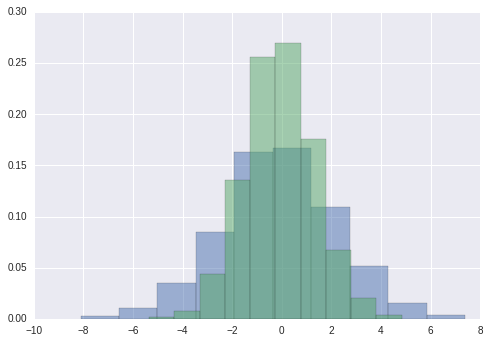

In [10]:
# Exemplo de histogramas

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

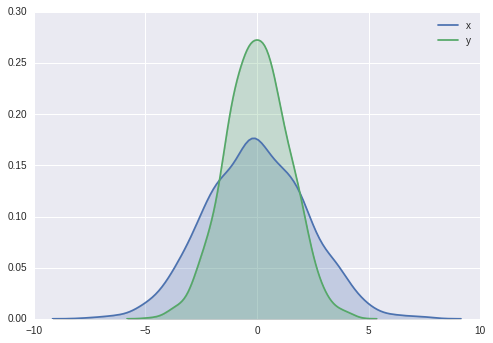

In [8]:
# Suavização de curva com Seaborn
# Usando estimação de densidade de kernel - kernel density estimation
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

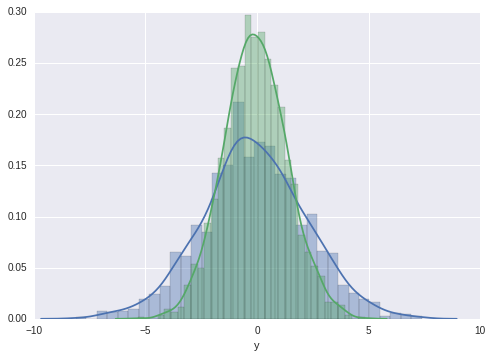

In [11]:
# Combinando histograma com KDE
sns.distplot(data['x'])
sns.distplot(data['y']);

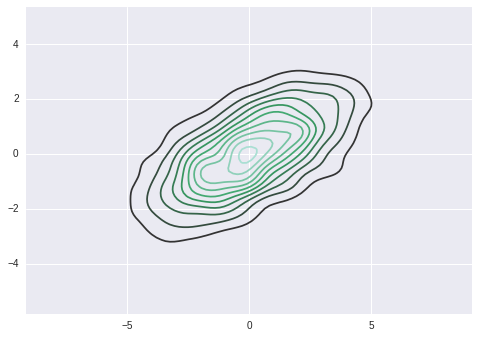

In [10]:
# Se for passado um dataset bi-dimensional para o método kdeplot(),
# será visualizado a curva de superfícies do gráfico.
sns.kdeplot(data);

Podemos ver a distribuição conjunta e as distribuições marginais em conjunto usando o método sns.jointplot(). Para esse plot, definiremos o estilo em um fundo branco.

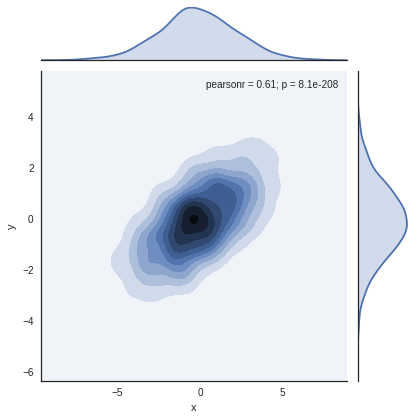

In [12]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

Existem outros parâmetros que podem ser passados para o método joinplot(), por exemplo, podemos usar um histograma hexagonal em vez disso.

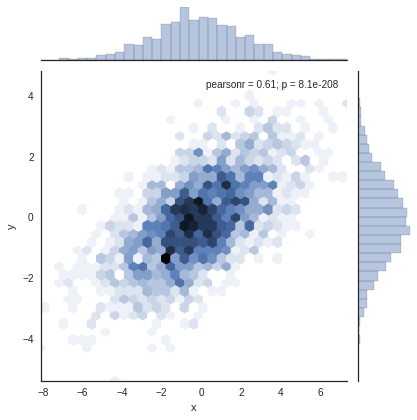

In [13]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

#### PLots aos Pares

Quando se usa conjuntos de dados de dimensões maiores que 02, você termina utilizando gráficos de pares de variáveis. Isso é muito útil para explorar correlações entre dados multidimensionais, quando você deseja traçar todos os pares de valores uns contra os outros.

Vamos demonstrar isso com o bem conhecido conjunto de dados Iris, que lista medidas de pétalas e sépalas de três espécies de íris.

In [14]:
# Exemplo do dataset Iris
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


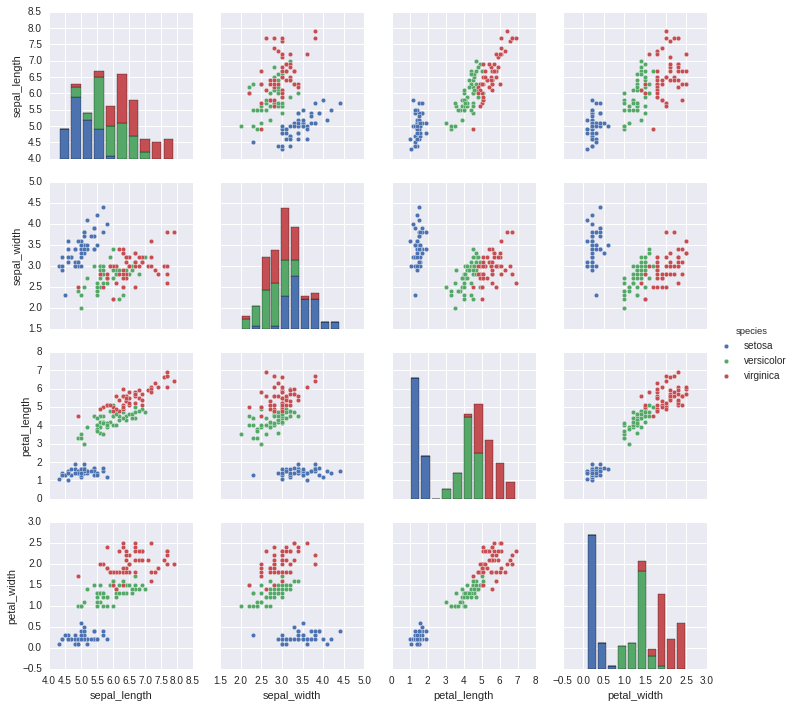

In [15]:
# Para visualizar as relações multidimensionais entre as amostras
# aos pares basta utilizar o método sns.pairplot()

sns.pairplot(iris, hue='species', size=2.5);

#### Histogramas com facetas

Às vezes, a melhor maneira de ver dados é através de histogramas de subconjuntos. O FacetGrid de Seaborn torna isso extremamente simples. Vamos dar uma olhada em alguns dados que mostram o valor que a equipe do restaurante recebe em gorgeta com base em vários dados de indicadores.

In [15]:
# Exemplo com o dataset 'tips'
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


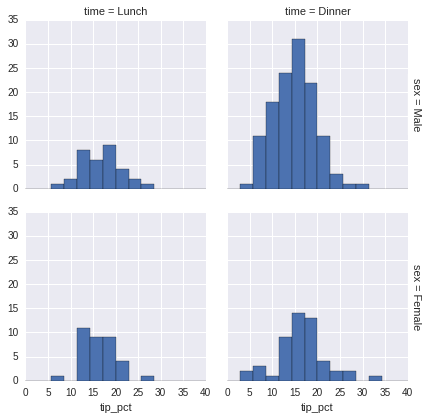

In [17]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

- Quem geralmente dá melhores gorgetas, mulheres ou homens? 
- O valor da conta tem relação com o valor da gorgeta?

#### Plots de fatores

Os gráficos de fatores (factorplot) também podem ser úteis para esse tipo de visualização. Isso permite que você visualize a distribuição de um parâmetro dentro dos compartimentos definidos por qualquer outro parâmetro.
- Generalização do boxplot.

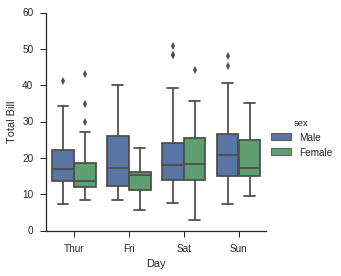

In [16]:
# Exemplo de factorplot
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

#### Distribuições conjuntas

Semelhante ao parplot que vimos anteriormente, podemos usar sns.jointplot para mostrar a distribuição conjunta entre conjuntos de dados diferentes, juntamente com as distribuições marginais associadas.

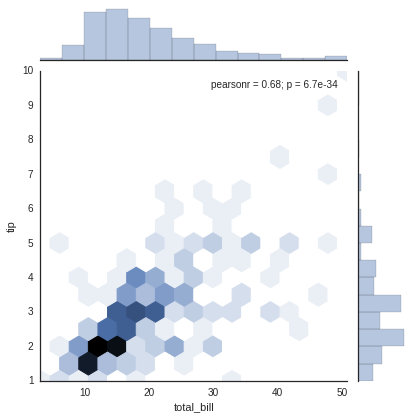

In [17]:
# Exemplo de uso do jointplot - distribuição conjunta
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

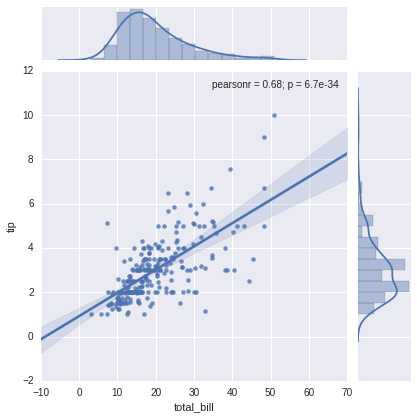

In [18]:
# O plot pode ser usar o KDE e regessão 
sns.jointplot("total_bill", "tip", data=tips, kind='reg');


#### Plots de Barras
Sérias temporais podem ser plotadas usando-se o método sns.factorplot().

In [22]:
# Exemplo como o dataser Planets
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


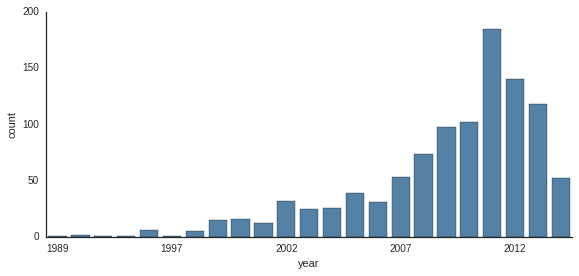

In [23]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

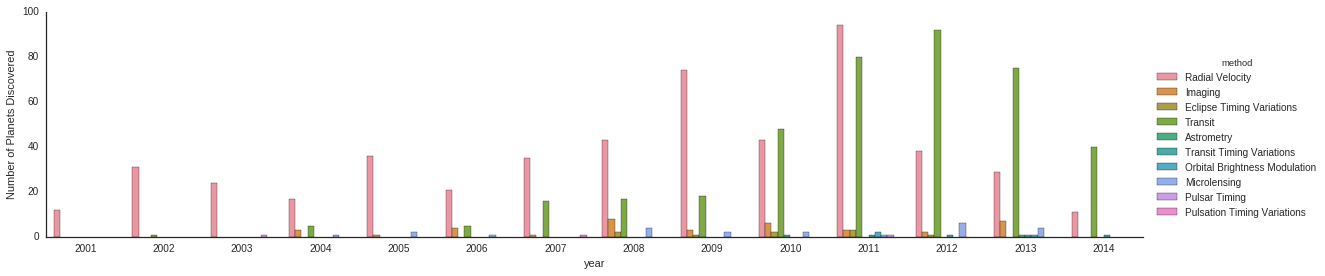

In [24]:
# Exemplo - método utilizado para descoberta dos planetas entre 2001 e 2015
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

#### Exemplo: Calculando o tempo para completar uma maratona
- Analisar e visualizar os dados.
- Obter os dados da Internet

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
data.to_csv("arquivo.csv")
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [30]:
# Vendo o tipo dos dados:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [34]:
def convert_time(s):
    h, m, s =map(int, s.split(":"))
    return pd.datetime.timedelta(hours=h,minutes=m,secods=s)

As colunas de tempo (split, final) foram carregadas como objetos string.
Precisamos converter essas colunas em tipo times.

In [35]:
data1 = pd.read_csv('arquivo.csv', converters={'split':convert_time,'final':convert_time})
#data1.head()

ValueError: not enough values to unpack (expected 3, got 2)

In [33]:
data1.head()

NameError: name 'data1' is not defined

In [ ]:
data1.dtypes

In [ ]:
# Incluir colunas com tempo em segundos

data1['split_sec'] = data1['split'].astype(int) / 1E9
data1['final_sec'] = data1['final'].astype(int) / 1E9
data1.head()

In [ ]:
# Usando o método joitplot()

with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data1, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [ ]:
# Inclusão de mais uma coluna Split_frac
# que mede o grau em que cada corredor
# correu mais rápido a segunda metade da maratona em relação à primeira

data1['split_frac'] = 1 - 2 * data1['split_sec'] / data1['final_sec']
data1.head()

In [ ]:
# Explique o significado do gráfico a seguir

sns.distplot(data1['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");



In [ ]:
# calcule a quantidade de corredores
# que foram mais rápidos na segunda metade da maratona


In [ ]:
# Qual foi o tempo e o sexo do ganhador?
# Ele/ela correu mais rápido a primeira ou segunda metade da maratona?


Verificação se há correlação entre a 'split_frac' e outras variáveis. Vamos fazer isso usando o método ParGrid(), que plota parcelas de todas essas correlações.

In [ ]:
# Uso do método PairGrid - correlação aos pares

g = sns.PairGrid(data1, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();



In [ ]:
# Análise da split_frac em função do sexo do corredor(a)
sns.kdeplot(data1.split_frac[data1.gender=='M'], label='men', shade=True)
sns.kdeplot(data1.split_frac[data1.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

In [ ]:
# Gráfico de violino - bom para distribuições bimodais
sns.violinplot("gender", "split_frac", data=data1,
               palette=["lightblue", "lightpink"]);

Para analisar mais em detahesdo, podemos compare estes gráficos de violino em função da idade. Para isto, ccriaremos uma nova coluna na matriz que especifica a década de idade em que cada pessoa possui.

In [ ]:
# Inclusão da coluna de idade em décadas dos corredores
data1['age_dec'] = data1.age.map(lambda age: 10 * (age // 10))
data1.head()

In [ ]:
men = (data1.gender == 'M')
women = (data1.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data1,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [ ]:
# Há quantos corredores do sexo masculino com 80 anos ou mais?
# Qual é a faixa de idade que há mais corredores homens?


In [ ]:
# Há quantas corredoras entre 30 e 40 anos?
# Qual é a faixa de idade que há mais corredoras?


De volta aos homens com 'split_frac' negativas: quem são esses corredores? A 'split_frac'se correlaciona com o final rápido da prova? 
Podemos traçar um gráfico com esta informação usando o método lmplot(), que irá aplicar uma regressão linear aos dados.

In [ ]:
# Uso do método lmplot()

g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data1,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");



Podemos dizer que os corredores mais rápidos tendem a acelerar no final da prova?